## Importing Package

In [80]:
# %pip install missingno

In [105]:
import pandas as pd
import numpy as nyp
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.datasets import get_data
import pandas as pd
import missingno as msno
import math
from pycaret.regression import *

In [82]:
sns.set_style("whitegrid")
custom_palette = ["#4C72B0", "#55A868", "#C44E52", "#8172B2", "#CCB974", "#64B5CD"]
sns.set_palette(custom_palette)

## Exploratory Data Analysis

In [83]:
df = pd.read_csv('../../data/raw/01_Melbourne_Residential.csv')
df.head()

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount
0,Airport West,154 Halsey Rd,3,t,840000,PI,Nelson,3/9/2023,13.5,3042,...,2,1.0,303,225.0,2016.0,Moonee Valley,-37.7180,144.8780,Western Metropolitan,3464
1,Albert Park,105 Kerferd Rd,2,h,1275000,S,hockingstuart,3/9/2023,3.3,3206,...,1,0.0,120,82.0,1900.0,Port Phillip,-37.8459,144.9555,Southern Metropolitan,3280
2,Albert Park,85 Richardson St,2,h,1455000,S,Thomson,3/9/2023,3.3,3206,...,1,0.0,159,NaN,NaN,Port Phillip,-37.8450,144.9538,Southern Metropolitan,3280
3,Alphington,6 Smith St,4,h,2000000,S,Brace,3/9/2023,6.4,3078,...,2,4.0,853,263.0,1930.0,Darebin,-37.7707,145.0318,Northern Metropolitan,2211
4,Alphington,5/6 Yarralea St,3,h,1110000,S,Jellis,3/9/2023,6.4,3078,...,2,2.0,208,NaN,2013.0,Yarra,-37.7854,145.0325,Northern Metropolitan,2211


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  int64  
 5   Method         13580 non-null  object 
 6   Seller         13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  int64  
 10  Bedroom2       13580 non-null  int64  
 11  Bathroom       13580 non-null  int64  
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  int64  
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

In [85]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


In [86]:
df.isnull().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Region              0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
Seller              0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

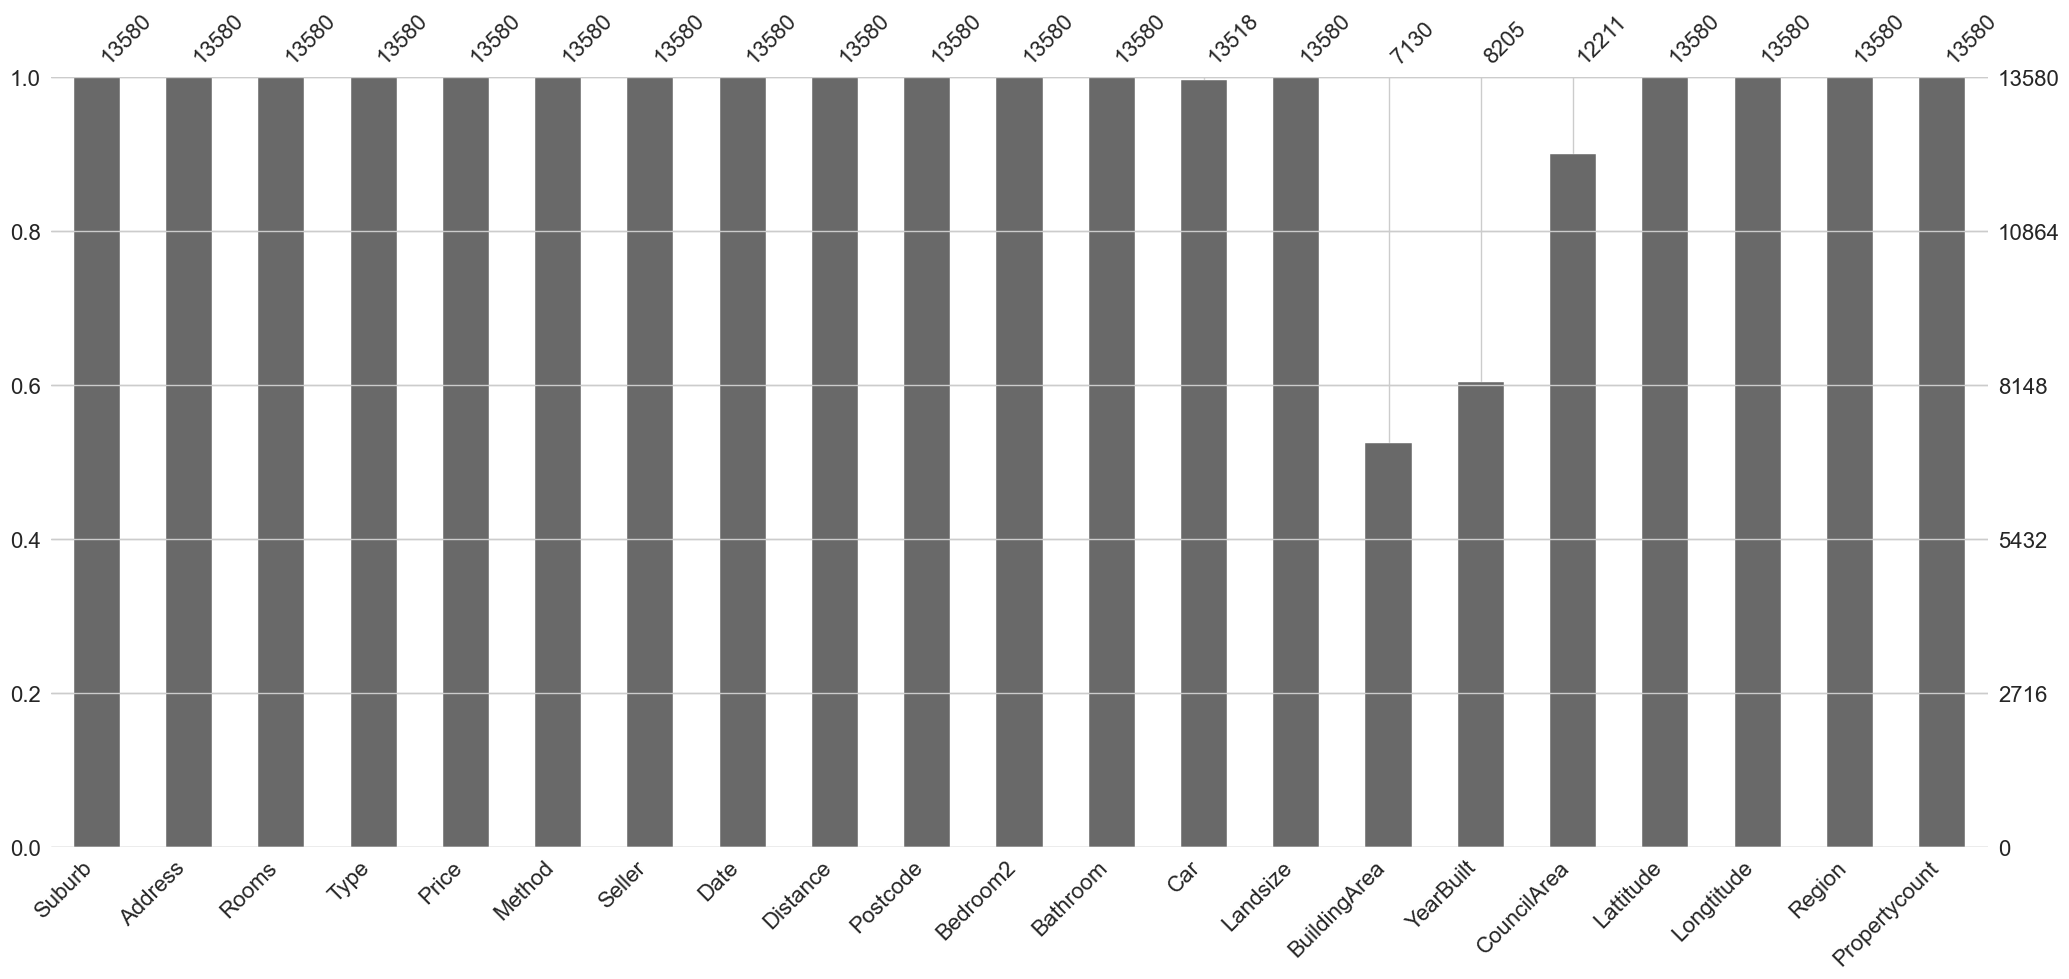

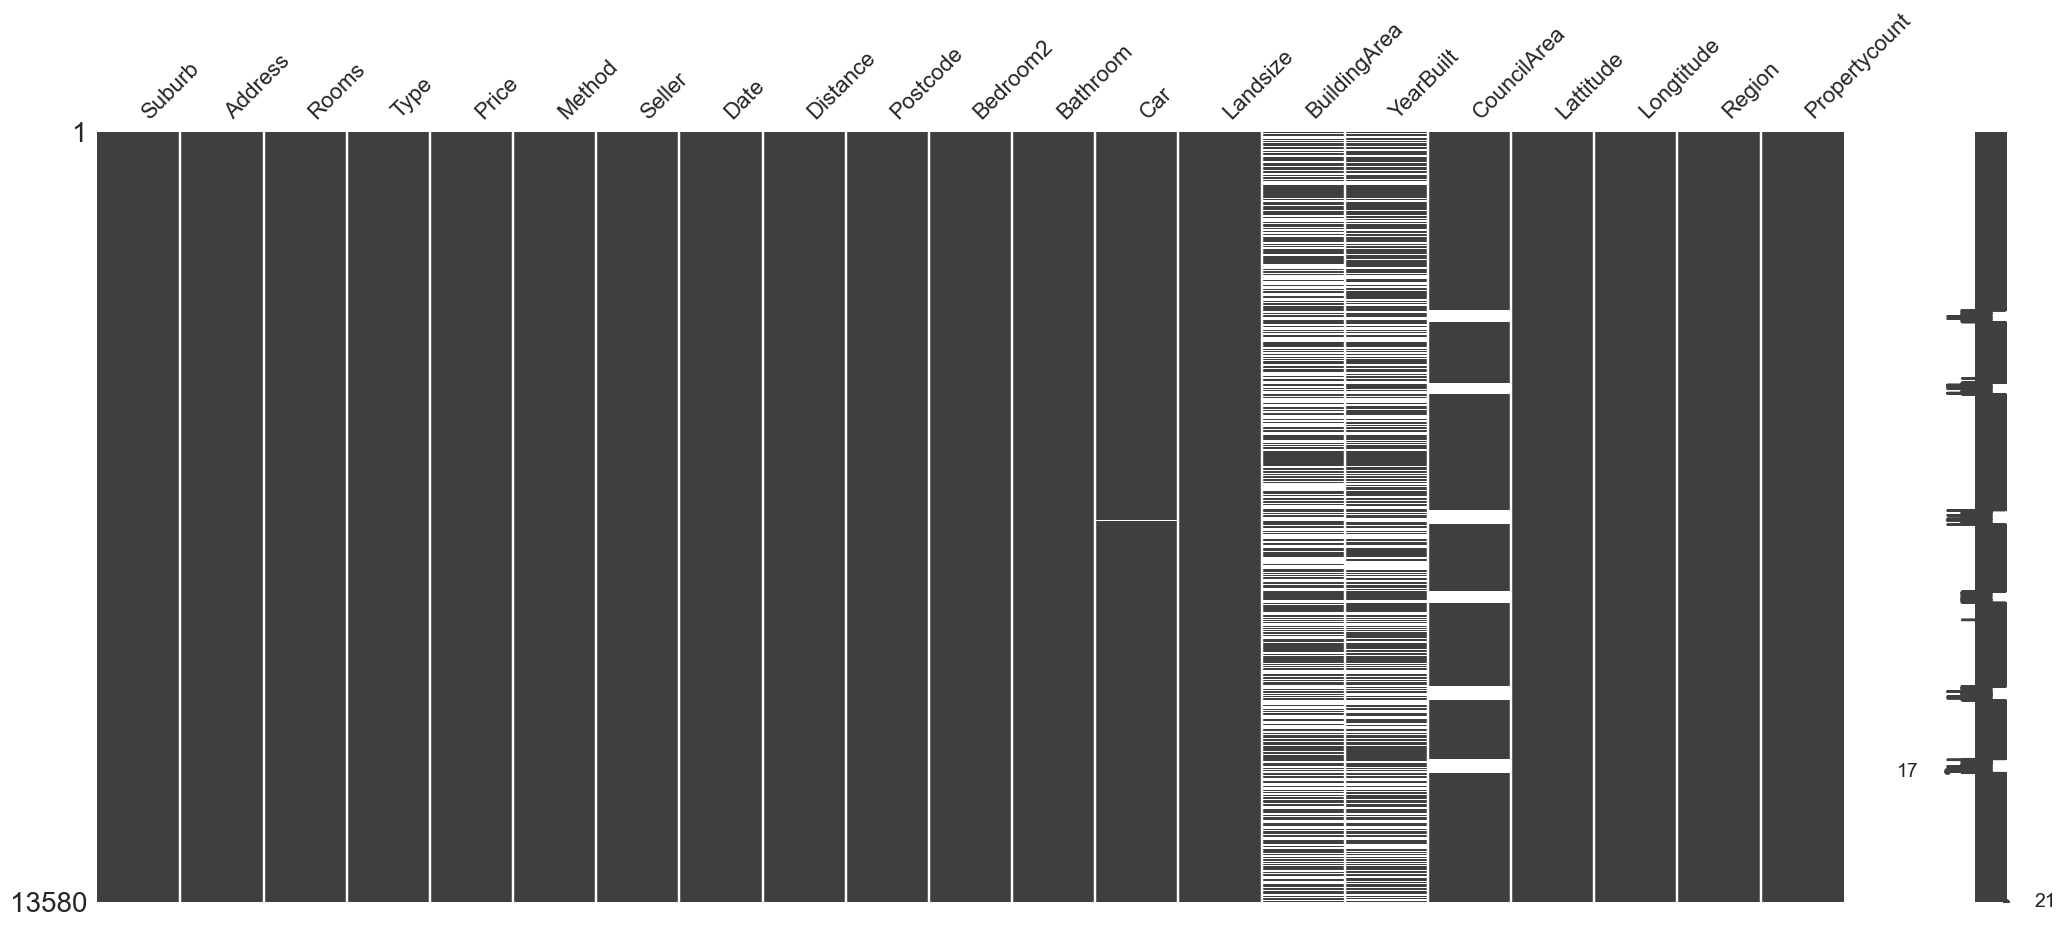

In [87]:
msno.bar(df)
msno.matrix(df)

plt.show()

In [88]:
df[df.duplicated()]

,Suburb,Address,Rooms,Type,Price,Method,Seller,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Region,Propertycount


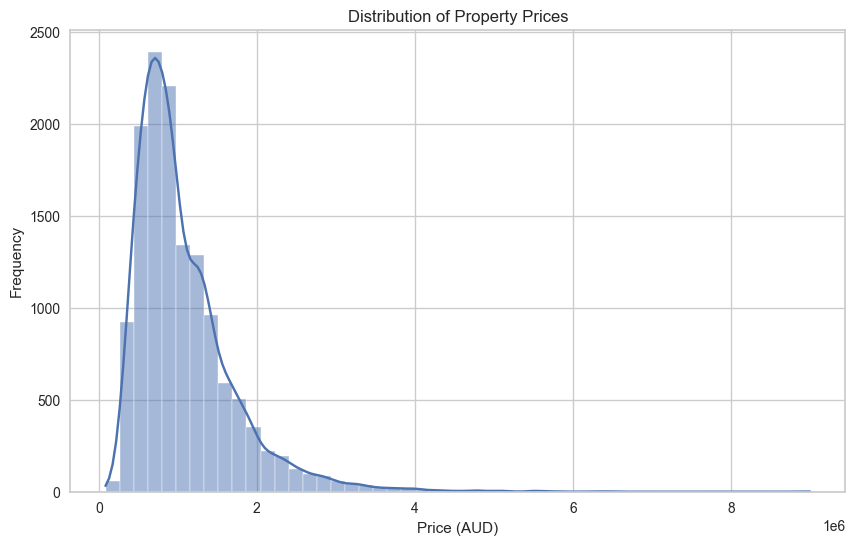

In [89]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=50, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price (AUD)")
plt.ylabel("Frequency")
plt.show()

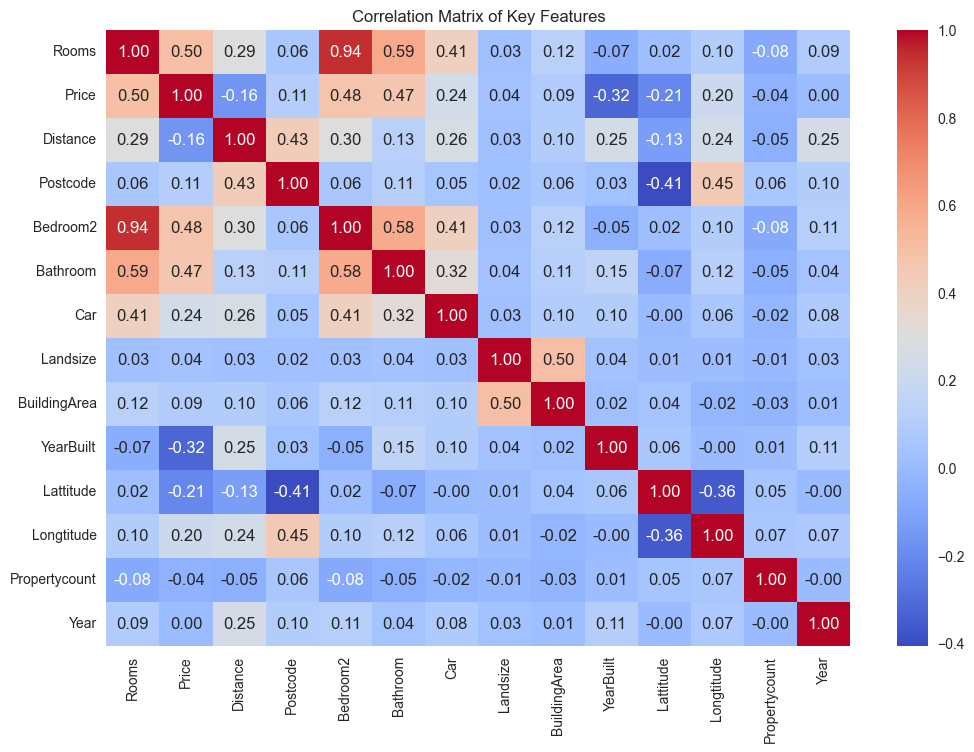

In [99]:
plt.figure(figsize=(12, 8))
corr_matrix = df.corr(numeric_only = True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.show()

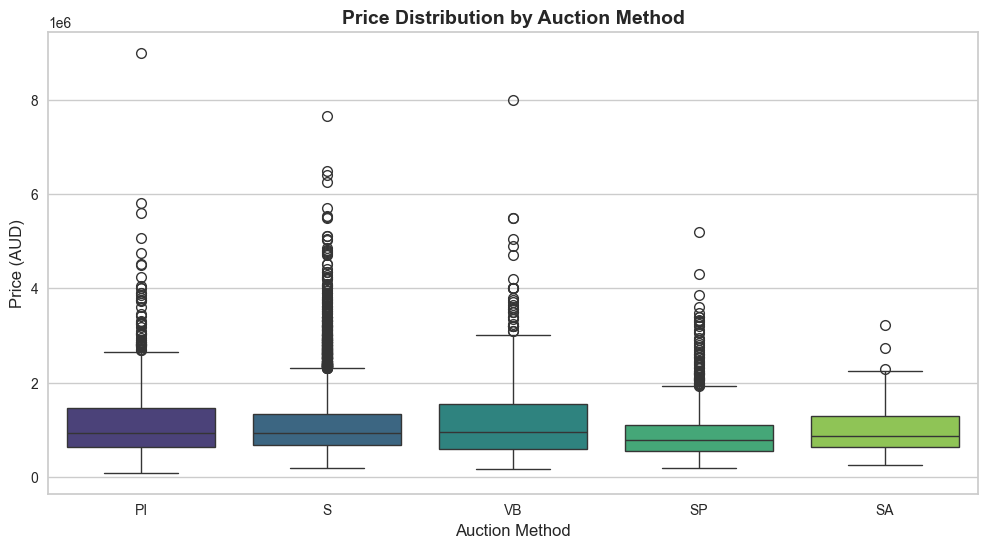

In [153]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Method", y="Price", palette="viridis")

plt.title("Price Distribution by Auction Method", fontsize=14, fontweight="bold")
plt.xlabel("Auction Method", fontsize=12)
plt.ylabel("Price (AUD)", fontsize=12)
plt.xticks(fontsize=10)
plt.show()

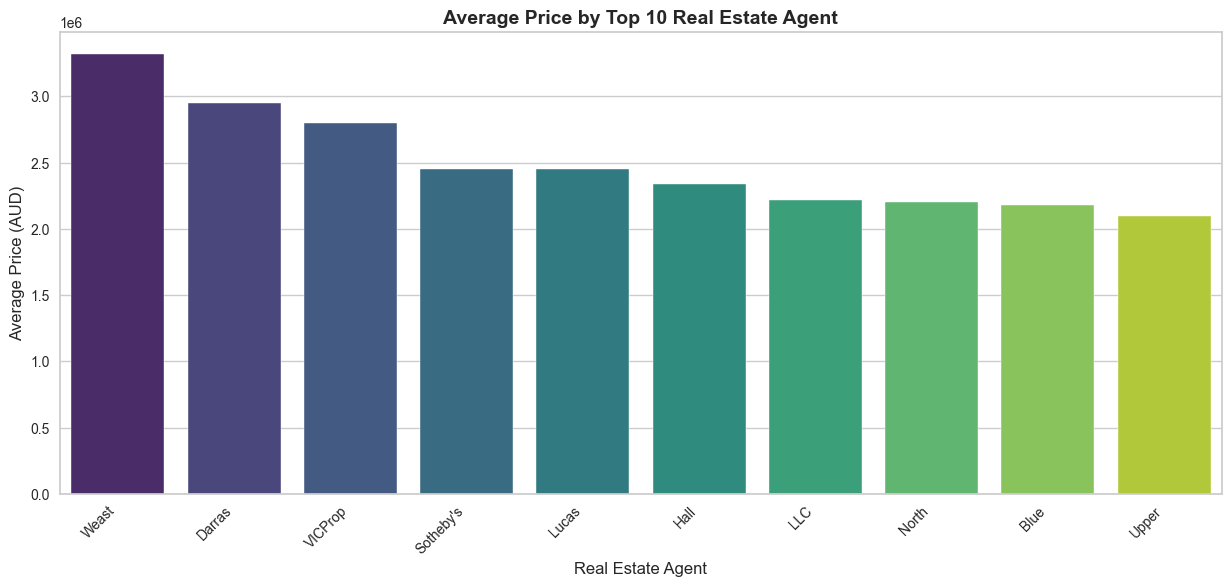

In [154]:
plt.figure(figsize=(15, 6))
avg_price_by_seller = df.groupby("Seller")["Price"].mean().sort_values(ascending=False).head(10)

sns.barplot(x=avg_price_by_seller.index, y=avg_price_by_seller.values, palette="viridis")

plt.title("Average Price by Top 10 Real Estate Agent", fontsize=14, fontweight="bold")
plt.xlabel("Real Estate Agent", fontsize=12)
plt.ylabel("Average Price (AUD)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.show()

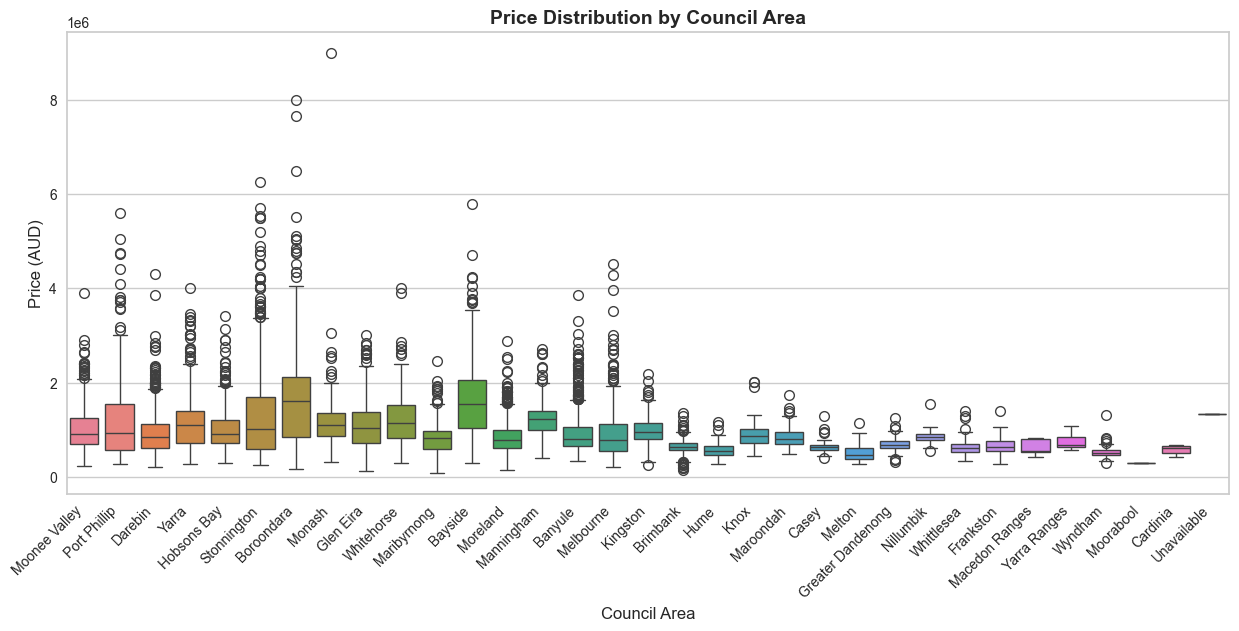

In [124]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, x="CouncilArea", y="Price", hue="CouncilArea")
plt.legend().remove()

plt.xticks(rotation=45, ha="right", fontsize=10)
plt.title("Price Distribution by Council Area", fontsize=14, fontweight="bold")
plt.xlabel("Council Area", fontsize=12)
plt.ylabel("Price (AUD)", fontsize=12)
plt.show()

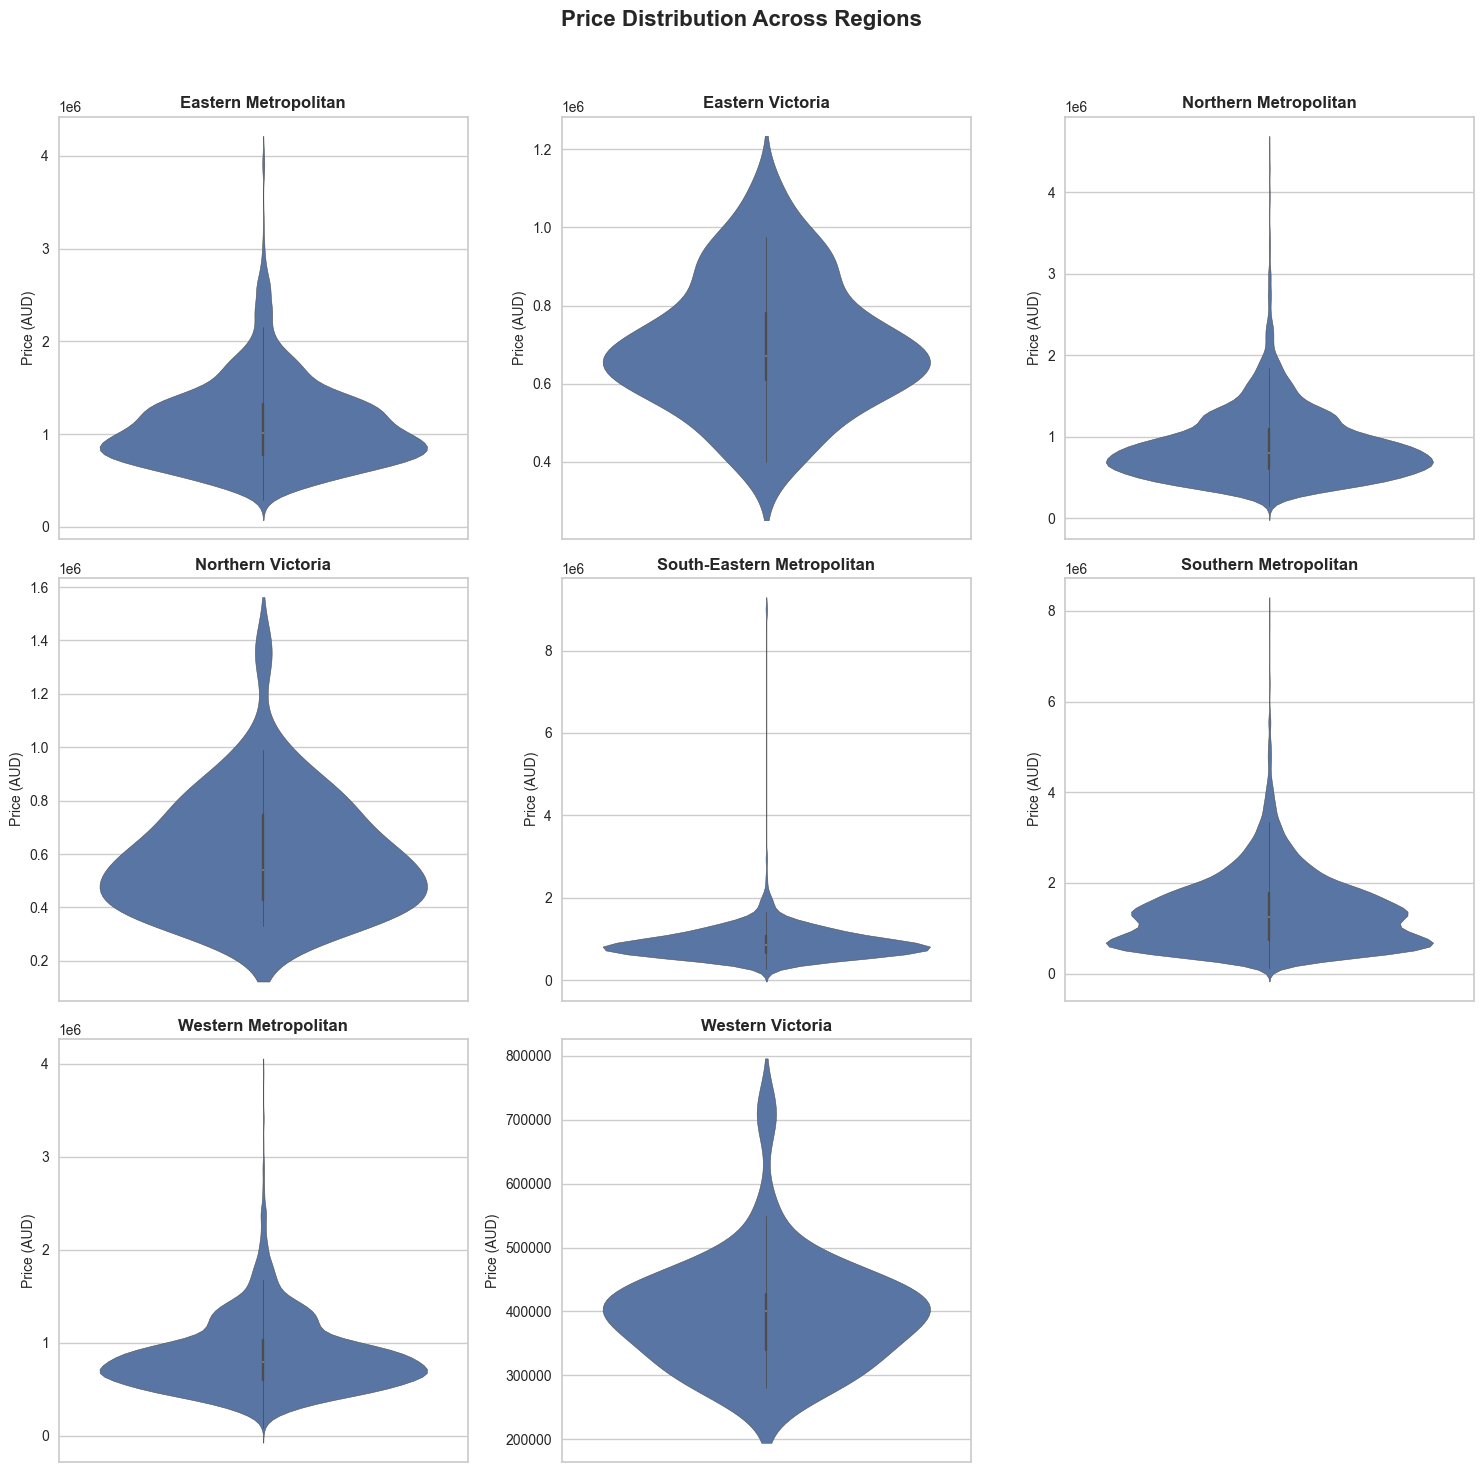

In [110]:
regions = sorted(df["Region"].dropna().unique())  
num_regions = len(regions)

cols = 3
rows = math.ceil(num_regions / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  
fig.suptitle("Price Distribution Across Regions", fontsize=16, fontweight="bold")

axes = axes.flatten()

for i, region in enumerate(regions):
    sns.violinplot(data=df[df["Region"] == region], y="Price", ax=axes[i])
    axes[i].set_title(region, fontsize=12, fontweight="bold")
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Price (AUD)", fontsize=10)
    axes[i].tick_params(axis='x', which='both', bottom=False)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.show()

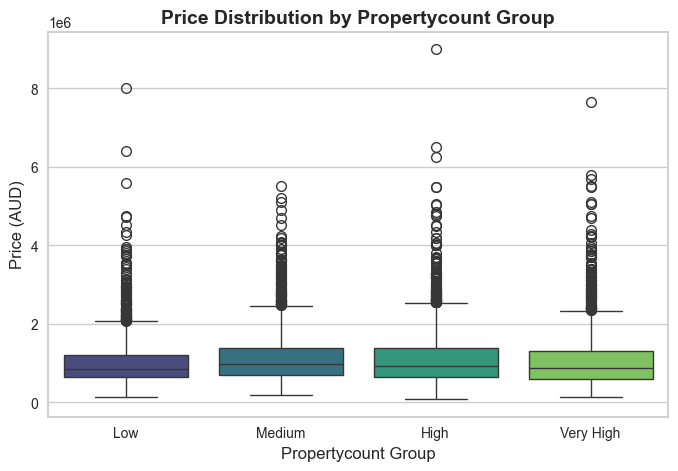

In [155]:
df['Propertycount_Bin'] = pd.qcut(df['Propertycount'], q=4, labels=["Low", "Medium", "High", "Very High"])

plt.figure(figsize=(8, 5))
sns.boxplot(x='Propertycount_Bin', y='Price', data=df, palette="viridis")
plt.title("Price Distribution by Propertycount Group", fontsize=14, fontweight="bold")
plt.xlabel("Propertycount Group", fontsize=12)
plt.ylabel("Price (AUD)", fontsize=12)
plt.show()

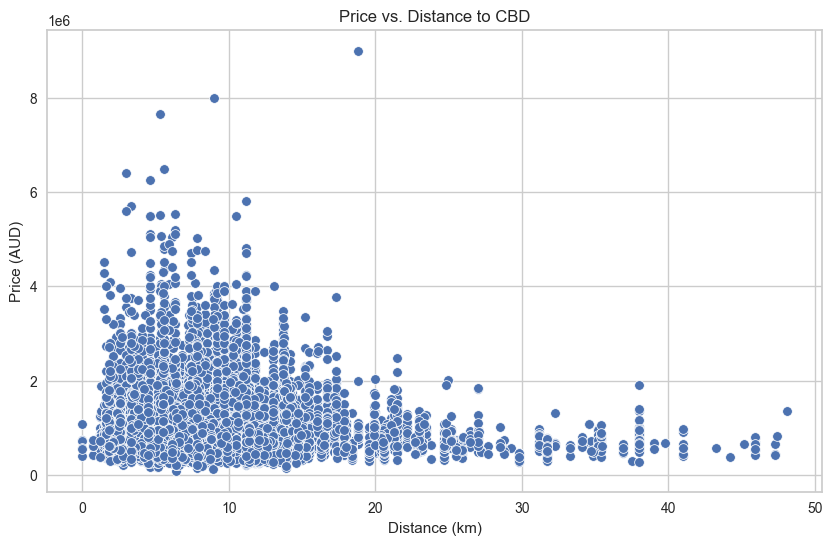

In [91]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Price')
plt.title("Price vs. Distance to CBD")
plt.xlabel("Distance (km)")
plt.ylabel("Price (AUD)")
plt.show()

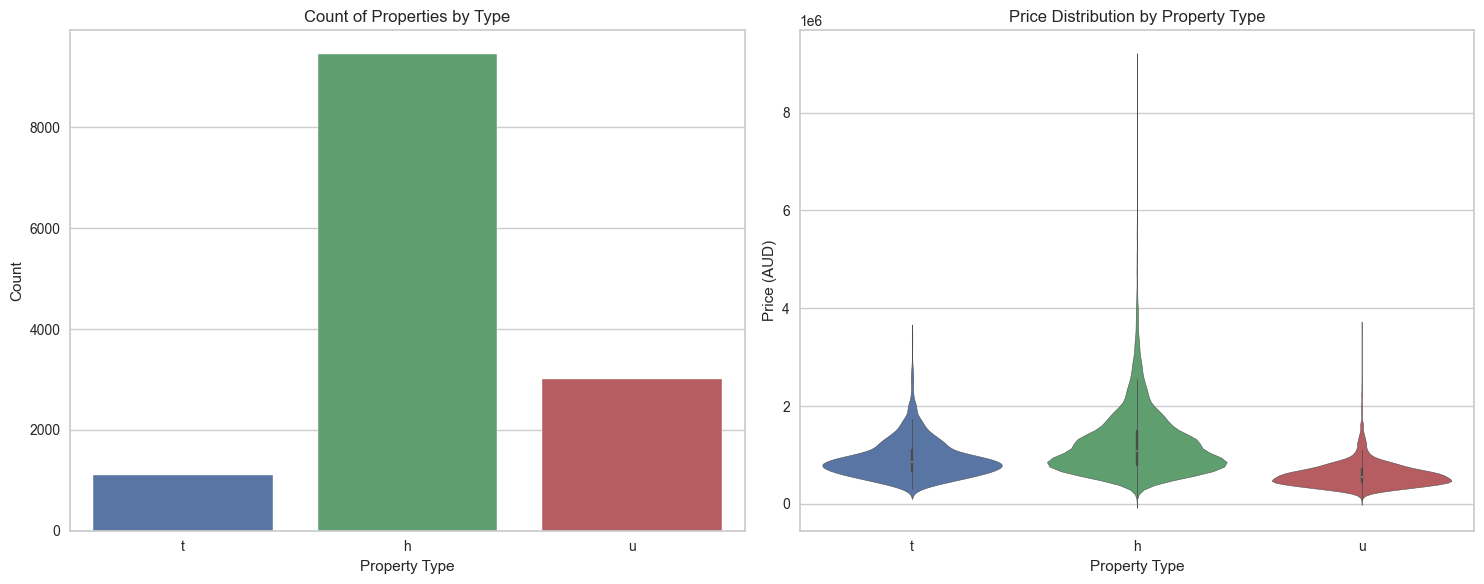

In [92]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.countplot(x='Type', data=df, hue='Type', ax=axes[0])
axes[0].set_title("Count of Properties by Type")
axes[0].set_xlabel("Property Type")
axes[0].set_ylabel("Count")

sns.violinplot(x='Type', y='Price', data=df, hue='Type', ax=axes[1])
axes[1].set_title("Price Distribution by Property Type")
axes[1].set_xlabel("Property Type")
axes[1].set_ylabel("Price (AUD)")

plt.tight_layout()
plt.show()

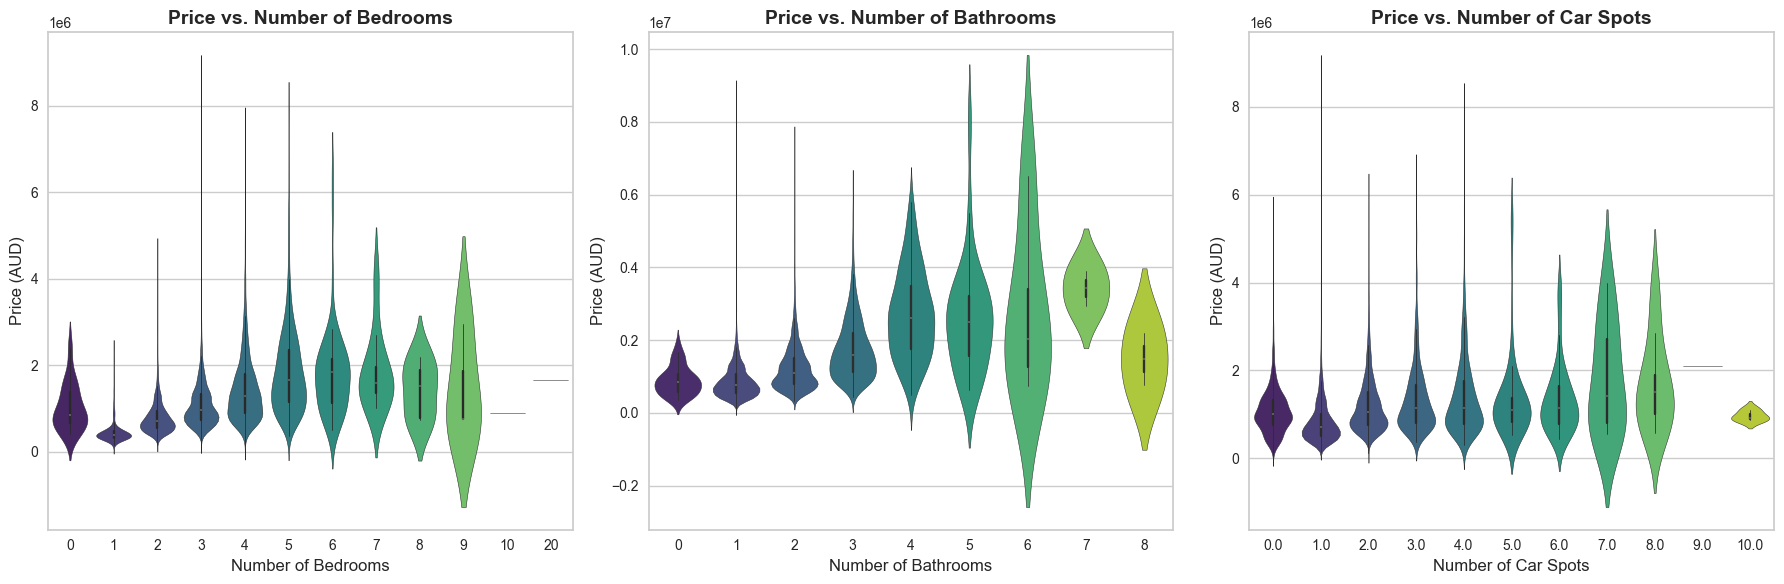

In [147]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.violinplot(data=df, x="Bedroom2", y="Price", palette="viridis", ax=axes[0])
axes[0].set_title("Price vs. Number of Bedrooms", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Number of Bedrooms", fontsize=12)
axes[0].set_ylabel("Price (AUD)", fontsize=12)

sns.violinplot(data=df, x="Bathroom", y="Price", palette="viridis", ax=axes[1])
axes[1].set_title("Price vs. Number of Bathrooms", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Number of Bathrooms", fontsize=12)
axes[1].set_ylabel("Price (AUD)", fontsize=12)

sns.violinplot(data=df, x="Car", y="Price", palette="viridis", ax=axes[2])
axes[2].set_title("Price vs. Number of Car Spots", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Number of Car Spots", fontsize=12)
axes[2].set_ylabel("Price (AUD)", fontsize=12)

plt.tight_layout()
plt.show()

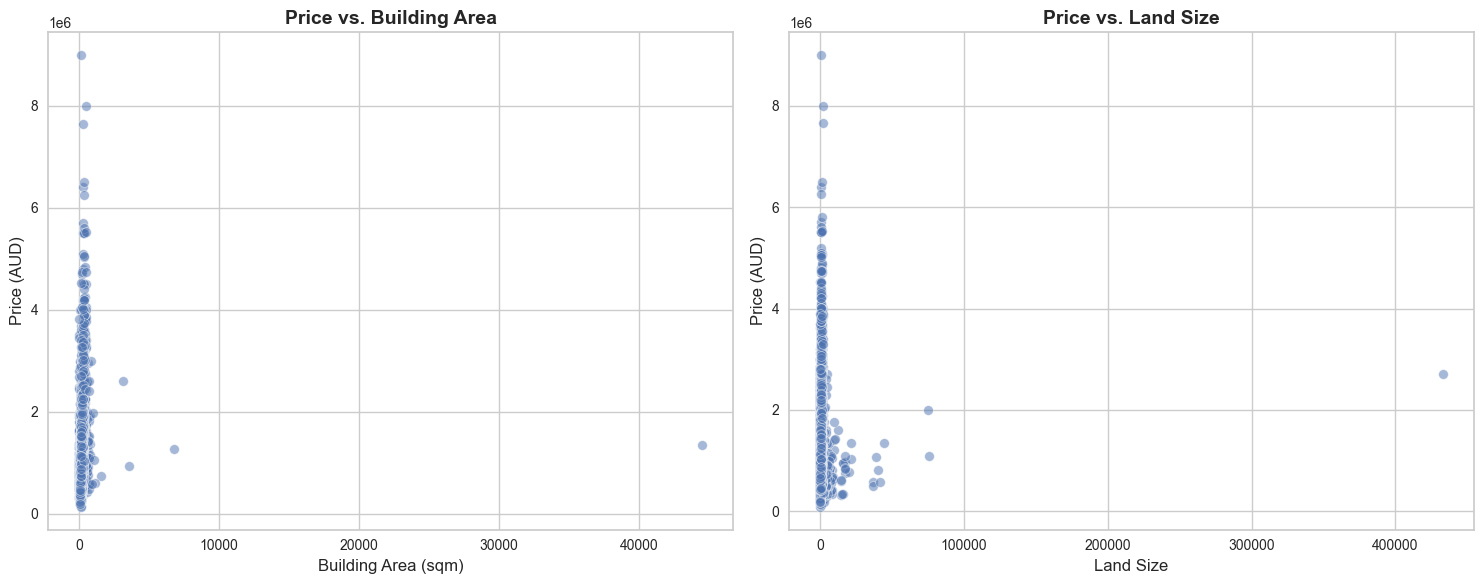

In [139]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

sns.scatterplot(data=df, x="BuildingArea", y="Price", alpha=0.5, color="#4C72B0", ax=axes[0])
axes[0].set_title("Price vs. Building Area", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Building Area (sqm)", fontsize=12)
axes[0].set_ylabel("Price (AUD)", fontsize=12)

sns.scatterplot(data=df, x="Landsize", y="Price", alpha=0.5, color="#4C72B0", ax=axes[1])
axes[1].set_title("Price vs. Land Size", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Land Size", fontsize=12)
axes[1].set_ylabel("Price (AUD)", fontsize=12)

plt.tight_layout()
plt.show()

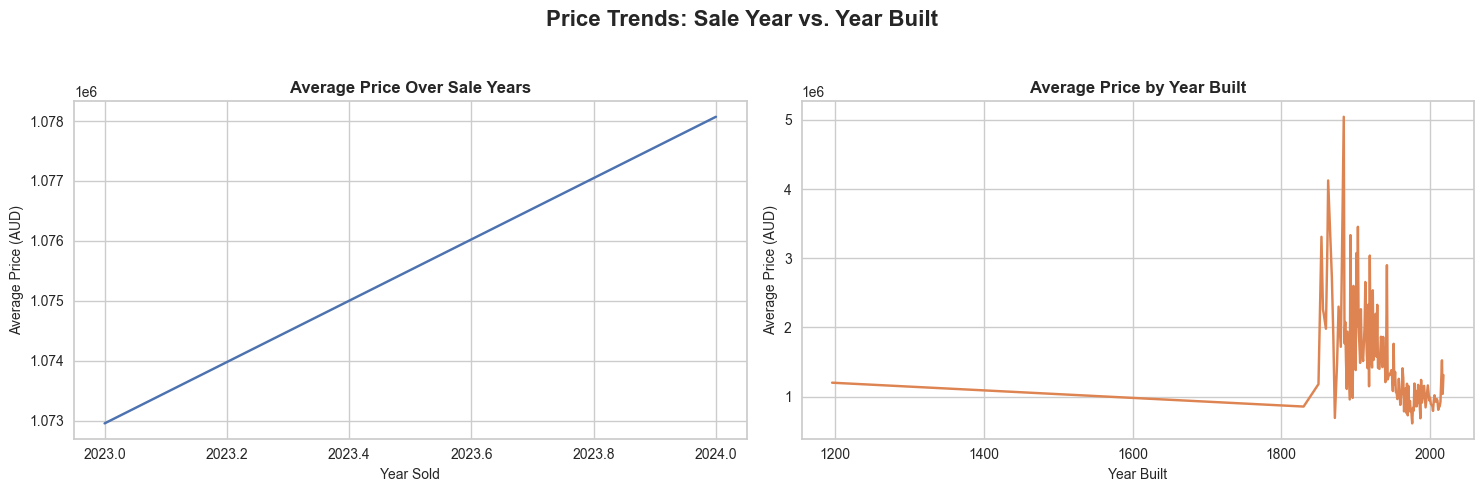

In [125]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df['Year'] = df['Date'].dt.year

avg_price_yearly = df.groupby('Year')['Price'].mean().reset_index()
avg_price_built = df.groupby('YearBuilt')['Price'].mean().reset_index()

fig, axes = plt.subplots(1, 2, figsize=(15, 5))  
fig.suptitle("Price Trends: Sale Year vs. Year Built", fontsize=16, fontweight="bold")

sns.lineplot(data=avg_price_yearly, x='Year', y='Price', ax=axes[0], color="#4C72B0")
axes[0].set_title("Average Price Over Sale Years", fontsize=12, fontweight="bold")
axes[0].set_xlabel("Year Sold", fontsize=10)
axes[0].set_ylabel("Average Price (AUD)", fontsize=10)

sns.lineplot(data=avg_price_built, x='YearBuilt', y='Price', ax=axes[1], color="#DD8452")
axes[1].set_title("Average Price by Year Built", fontsize=12, fontweight="bold")
axes[1].set_xlabel("Year Built", fontsize=10)
axes[1].set_ylabel("Average Price (AUD)", fontsize=10)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

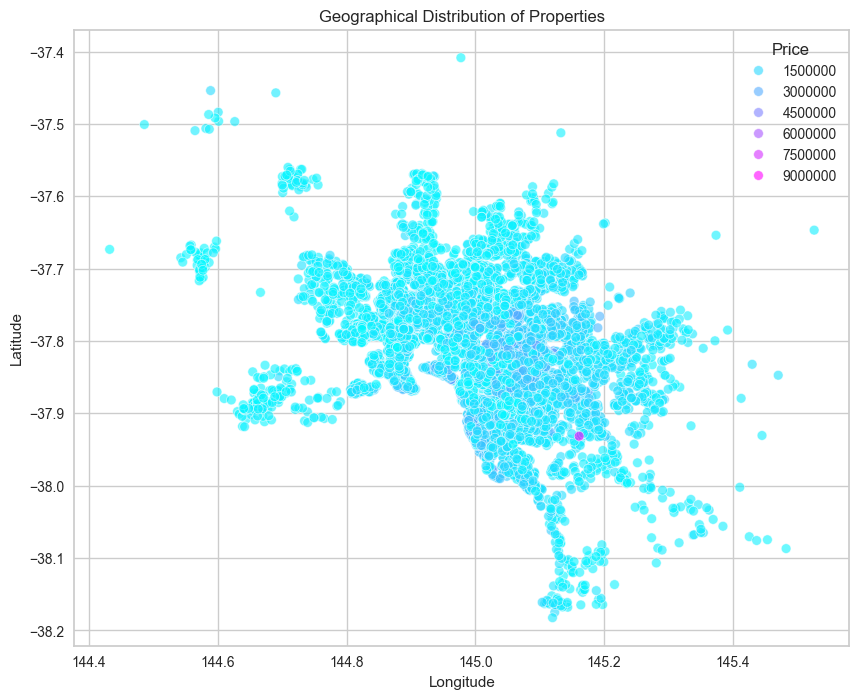

In [157]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Longtitude', y='Lattitude', hue='Price', palette='cool', alpha=0.6)
plt.title("Geographical Distribution of Properties")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(title="Price", bbox_to_anchor=(1, 1))
plt.show()

## Data Preparation

In [97]:
reg1 = setup(data=df, target='Price')

,Description,Value
0,Session id,2398
1,Target,Price
2,Target type,Regression
3,Original data shape,"(13580, 22)"
4,Transformed data shape,"(13580, 37)"
5,Transformed train set shape,"(9506, 37)"
6,Transformed test set shape,"(4074, 37)"
7,Numeric features,13
8,Date features,1
9,Categorical features,7
